In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import os
import multiprocessing as mp
from datetime import datetime, timezone, timedelta

# Supress warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import time

import tensorflow as tf
from tensorflow import keras

import random
random.seed(21)
from numpy.random import seed
np.random.seed(21)
tf.random.set_seed(21)

In [2]:
#IMPORT DATA FROM PREPROCESSING (UPDATE PATHS TO RUN)
x_train = pd.read_csv(r"C:\Users\cgrac\CMT307\x_train.csv")
y_train = pd.read_csv(r"C:\Users\cgrac\CMT307\y_train.csv")
x_val = pd.read_csv(r"C:\Users\cgrac\CMT307\x_val.csv")
y_val = pd.read_csv(r"C:\Users\cgrac\CMT307\y_val.csv")

In [3]:
x_train.head()

,sea_level_pressure,site_id_mapped_BerkeleyCA,site_id_mapped_CardiffUK,site_id_mapped_CarletonOttawaCA,site_id_mapped_CornellNY,site_id_mapped_DublinIreland,site_id_mapped_LondonUK,site_id_mapped_OrlandoFL,site_id_mapped_OttawaCA,site_id_mapped_PrincetonNJ,...,month_dttm_March,month_dttm_May,month_dttm_November,month_dttm_October,month_dttm_September,square_feet,wind_speed,hour_dttm,air_temperature,dew_temperature
0,0.500816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.573547,-0.64,-0.090909,0.744737,0.900164
1,0.500816,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.103579,1.04,0.636364,0.534211,0.710311
2,-0.749184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.584865,0.20,0.727273,0.715789,0.900164
3,-0.999184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.202031,-0.64,-0.727273,0.656579,0.909984
4,1.625816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.067259,0.60,-0.454545,0.290789,0.327332


In [4]:
x_train.shape

(11422446, 57)

In [5]:
#Keras Reset
keras.backend.clear_session() 

In [6]:
#BASE MODEL RELU
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(57,)))
model.add(keras.layers.Dense(10, activation= 'relu'))
model.add(keras.layers.Dense(16, activation= 'relu'))
model.add(keras.layers.Dense(1, activation= 'relu'))
model.summary()

model.compile(loss = "mean_squared_error", optimizer='adam', metrics = ["root_mean_squared_error"])

# Model training
start = time.time()

historyRelu = model.fit(x_train, y_train, epochs = 10, validation_split=0.1, batch_size=512, callbacks=[early_stopping_cb])

end = time.time()
length = (end - start)/60

print(f'The model took {length} minutes to fit!')
print('The best model has the following metrics:')

model.evaluate(x_val, y_val)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 773 (3.02 KB)

 Trainable params: 773 (3.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 0.2463 - root_mean_squared_error: 0.4754 - val_loss: 0.1401 - val_root_mean_squared_error: 0.3742
Epoch 2/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 0.1397 - root_mean_squared_error: 0.3737 - val_loss: 0.1378 - val_root_mean_squared_error: 0.3712
Epoch 3/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.1378 - root_mean_squared_error: 0.3712 - val_loss: 0.1369 - val_root_mean_squared_error: 0.3700
Epoch 4/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.1369 - root_mean_squared_error: 0.3700 - val_loss: 0.1360 - val_root_mean_squared_error: 0.3688
Epoch 5/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 0.1361 - root_mean_squared_error: 0.3689 - val_loss: 0.1353 - val_root_mean_squared_error: 0.3679
Epoch 6/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 0.1352 - root_mean_squared_error: 0.3677 - val_loss: 0.1345 - val_root_mean_squared_error: 0.3667
Epoch 7/10
20079/20079

[0.1350177824497223, 0.3674476742744446]

In [7]:
#BASE MODEL ELU
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(57,)))
model.add(keras.layers.Dense(10, activation= 'elu'))
model.add(keras.layers.Dense(16, activation= 'elu'))
model.add(keras.layers.Dense(1, activation= 'elu'))
model.summary()

model.compile(loss = "mean_squared_error", optimizer='adam', metrics = ["root_mean_squared_error"])

# Model training
start = time.time()
historyElu = model.fit(x_train, y_train, epochs = 10, validation_split=0.1, batch_size=512, callbacks=[early_stopping_cb])

end = time.time()
length = (end - start)/60

print(f'The model took {length} minutes to fit!')
print('The best model has the following metrics:')
length = (end - start)/60

model.evaluate(x_val, y_val)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 773 (3.02 KB)

 Trainable params: 773 (3.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 0.2083 - root_mean_squared_error: 0.4471 - val_loss: 0.1405 - val_root_mean_squared_error: 0.3749
Epoch 2/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.1396 - root_mean_squared_error: 0.3737 - val_loss: 0.1360 - val_root_mean_squared_error: 0.3688
Epoch 3/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 0.1361 - root_mean_squared_error: 0.3690 - val_loss: 0.1337 - val_root_mean_squared_error: 0.3656
Epoch 4/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.1341 - root_mean_squared_error: 0.3662 - val_loss: 0.1324 - val_root_mean_squared_error: 0.3639
Epoch 5/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.1328 - root_mean_squared_error: 0.3645 - val_loss: 0.1312 - val_root_mean_squared_error: 0.3623
Epoch 6/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.1317 - root_mean_squared_error: 0.3629 - val_loss: 0.1300 - val_root_mean_squared_error: 0.3606
Epoch 7/10
20079/20079

[0.12991006672382355, 0.36043038964271545]

In [8]:
#BASE MODEL SELU
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(57,)))
model.add(keras.layers.Dense(10, activation= 'selu'))
model.add(keras.layers.Dense(16, activation= 'selu'))
model.add(keras.layers.Dense(1, activation= 'selu'))
model.summary()

model.compile(loss = "mean_squared_error", optimizer='adam', metrics = ["root_mean_squared_error"])

# Model training
start = time.time()
historySelu = model.fit(x_train, y_train, epochs = 10, validation_split=0.1, batch_size=512, callbacks=[early_stopping_cb])

end = time.time()
length = (end - start)/60

print(f'The model took {length} minutes to fit!')
print('The best model has the following metrics:')

model.evaluate(x_val, y_val)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │           580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 773 (3.02 KB)

 Trainable params: 773 (3.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 0.2292 - root_mean_squared_error: 0.4657 - val_loss: 0.1416 - val_root_mean_squared_error: 0.3763
Epoch 2/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 0.1396 - root_mean_squared_error: 0.3736 - val_loss: 0.1364 - val_root_mean_squared_error: 0.3693
Epoch 3/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.1357 - root_mean_squared_error: 0.3683 - val_loss: 0.1345 - val_root_mean_squared_error: 0.3667
Epoch 4/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.1343 - root_mean_squared_error: 0.3665 - val_loss: 0.1335 - val_root_mean_squared_error: 0.3654
Epoch 5/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 0.1335 - root_mean_squared_error: 0.3653 - val_loss: 0.1327 - val_root_mean_squared_error: 0.3643
Epoch 6/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 0.1328 - root_mean_squared_error: 0.3644 - val_loss: 0.1321 - val_root_mean_squared_error: 0.3634
Epoch 7/10
20079/20079

[0.13248558342456818, 0.36398568749427795]

In [9]:
#BASE MODEL Sigmoid
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(57,)))
model.add(keras.layers.Dense(10, activation= 'sigmoid'))
model.add(keras.layers.Dense(16, activation= 'sigmoid'))
model.add(keras.layers.Dense(1, activation= 'sigmoid'))
model.summary()

model.compile(loss = "mean_squared_error", optimizer='adam', metrics = ["root_mean_squared_error"])

# Model training
start = time.time()
historySigmoid = model.fit(x_train, y_train, epochs = 10, validation_split=0.1, batch_size=512, callbacks=[early_stopping_cb])
end = time.time()
length = (end - start)/60

print(f'The model took {length} minutes to fit!')
print('The best model has the following metrics:')
model.evaluate(x_val, y_val)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │           580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 773 (3.02 KB)

 Trainable params: 773 (3.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - loss: 1.4430 - root_mean_squared_error: 1.2010 - val_loss: 1.4237 - val_root_mean_squared_error: 1.1932
Epoch 2/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 1.4219 - root_mean_squared_error: 1.1924 - val_loss: 1.4237 - val_root_mean_squared_error: 1.1932
Epoch 3/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 1.4219 - root_mean_squared_error: 1.1924 - val_loss: 1.4237 - val_root_mean_squared_error: 1.1932
Epoch 4/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 1.4219 - root_mean_squared_error: 1.1924 - val_loss: 1.4237 - val_root_mean_squared_error: 1.1932
Epoch 5/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 1.4219 - root_mean_squared_error: 1.1924 - val_loss: 1.4237 - val_root_mean_squared_error: 1.1932
Epoch 6/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 1.4219 - root_mean_squared_error: 1.1924 - val_loss: 1.4237 - val_root_mean_squared_error: 1.1932
Epoch 7/10
20079/20079

[1.4401929378509521, 1.200080394744873]

In [10]:
#BASE MODEL Tanh
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(57,)))
model.add(keras.layers.Dense(10, activation= 'tanh'))
model.add(keras.layers.Dense(16, activation= 'tanh'))
model.add(keras.layers.Dense(1, activation= 'tanh'))
model.summary()

model.compile(loss = "mean_squared_error", optimizer='adam', metrics = ["root_mean_squared_error"])

# Model training
staart = time.time()
historyTanh = model.fit(x_train, y_train, epochs = 10, validation_split=0.1, batch_size=512, callbacks=[early_stopping_cb])

end = time.time()
length = (end - start)/60

print(f'The model too {length} minutes to fit!')
print('The best model has the following metrics:')
model.evaluate(x_val, y_val)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │           580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 773 (3.02 KB)

 Trainable params: 773 (3.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - loss: 1.4782 - root_mean_squared_error: 1.2136 - val_loss: 1.4234 - val_root_mean_squared_error: 1.1931
Epoch 2/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 1.4200 - root_mean_squared_error: 1.1916 - val_loss: 1.4197 - val_root_mean_squared_error: 1.1915
Epoch 3/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 1.4177 - root_mean_squared_error: 1.1907 - val_loss: 1.4194 - val_root_mean_squared_error: 1.1914
Epoch 4/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1.4175 - root_mean_squared_error: 1.1906 - val_loss: 1.4193 - val_root_mean_squared_error: 1.1913
Epoch 5/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 1.4175 - root_mean_squared_error: 1.1906 - val_loss: 1.4193 - val_root_mean_squared_error: 1.1913
Epoch 6/10
20079/20079 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 1.4175 - root_mean_squared_error: 1.1906 - val_loss: 1.4192 - val_root_mean_squared_error: 1.1913
Epoch 7/10
20079/20079

[1.4353123903274536, 1.198045253753662]

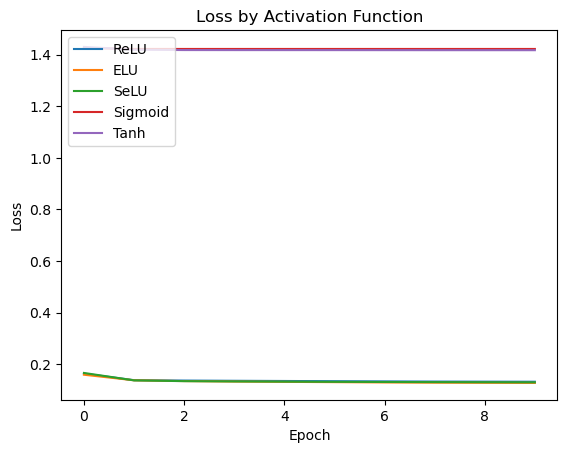

In [11]:
import matplotlib.pyplot as plt

plt.plot(historyRelu.history['loss'])
plt.plot(historyElu.history['loss'])
plt.plot(historySelu.history['loss'])
plt.plot(historySigmoid.history['loss'])
plt.plot(historyTanh.history['loss'])
plt.title('Loss by Activation Function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['ReLU', 'ELU', 'SeLU', 'Sigmoid', 'Tanh'], loc='upper left')
plt.show()

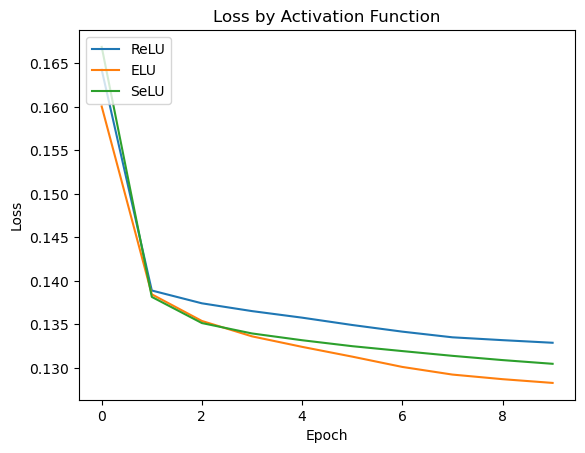

In [12]:
plt.plot(historyRelu.history['loss'])
plt.plot(historyElu.history['loss'])
plt.plot(historySelu.history['loss'])
plt.title('Loss by Activation Function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['ReLU', 'ELU', 'SeLU'], loc='upper left')
plt.show()